# Visualization

##### Our main goal from the visualization is to understand the data and to figure out the relation between the output and the features

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing

In [75]:
data = pd.read_csv("HCV-Egy-Data.csv")
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


## Renaming

In [76]:
data.rename(columns={'Age ': 'Age', 'Nausea/Vomting': 'Nausea_vomiting', 'Headache ':'Headache','Diarrhea ':'Diarrhea',
'Fatigue & generalized bone ache ': 'Fatigue_n_generalized_bone_ache', 'Jaundice ':'Jaundice', 'Epigastric pain ':'Epigastric_pain' }, inplace= True)
data.rename(columns={'AST 1': 'AST_1', 'ALT 1': 'ALT_1', 'ALT 12':'ALT_12','ALT 24':'ALT_24',
'ALT 36': 'ALT_36', 'ALT 48':'ALT_48', 'ALT after 24 w':'ALT_after_24_w', 'RNA Base':'RNA_Base', 'RNA 4':'RNA_4', 'RNA 12':'RNA_12', 'RNA EOT':'RNA_EOT',
                     'RNA EF':'RNA_EF', 'Baseline histological Grading':'Baseline_histological_Grading', 'Baselinehistological staging':'Baselinehistological_staging' }, inplace= True)

In [77]:
list(data)

['Age',
 'Gender',
 'BMI',
 'Fever',
 'Nausea_vomiting',
 'Headache',
 'Diarrhea',
 'Fatigue_n_generalized_bone_ache',
 'Jaundice',
 'Epigastric_pain',
 'WBC',
 'RBC',
 'HGB',
 'Plat',
 'AST_1',
 'ALT_1',
 'ALT4',
 'ALT_12',
 'ALT_24',
 'ALT_36',
 'ALT_48',
 'ALT_after_24_w',
 'RNA_Base',
 'RNA_4',
 'RNA_12',
 'RNA_EOT',
 'RNA_EF',
 'Baseline_histological_Grading',
 'Baselinehistological_staging']

## Exploring the data

In [78]:
data.describe()

,Age,Gender,BMI,Fever,Nausea_vomiting,Headache,Diarrhea,Fatigue_n_generalized_bone_ache,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24_w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1385 non-null   int64  
 1   Gender                           1385 non-null   int64  
 2   BMI                              1385 non-null   int64  
 3   Fever                            1385 non-null   int64  
 4   Nausea_vomiting                  1385 non-null   int64  
 5   Headache                         1385 non-null   int64  
 6   Diarrhea                         1385 non-null   int64  
 7   Fatigue_n_generalized_bone_ache  1385 non-null   int64  
 8   Jaundice                         1385 non-null   int64  
 9   Epigastric_pain                  1385 non-null   int64  
 10  WBC                              1385 non-null   int64  
 11  RBC                              1385 non-null   float64
 12  HGB                 

#### No null values and all values are whether int64 or float 64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EE02A1630>,
      dtype=object)

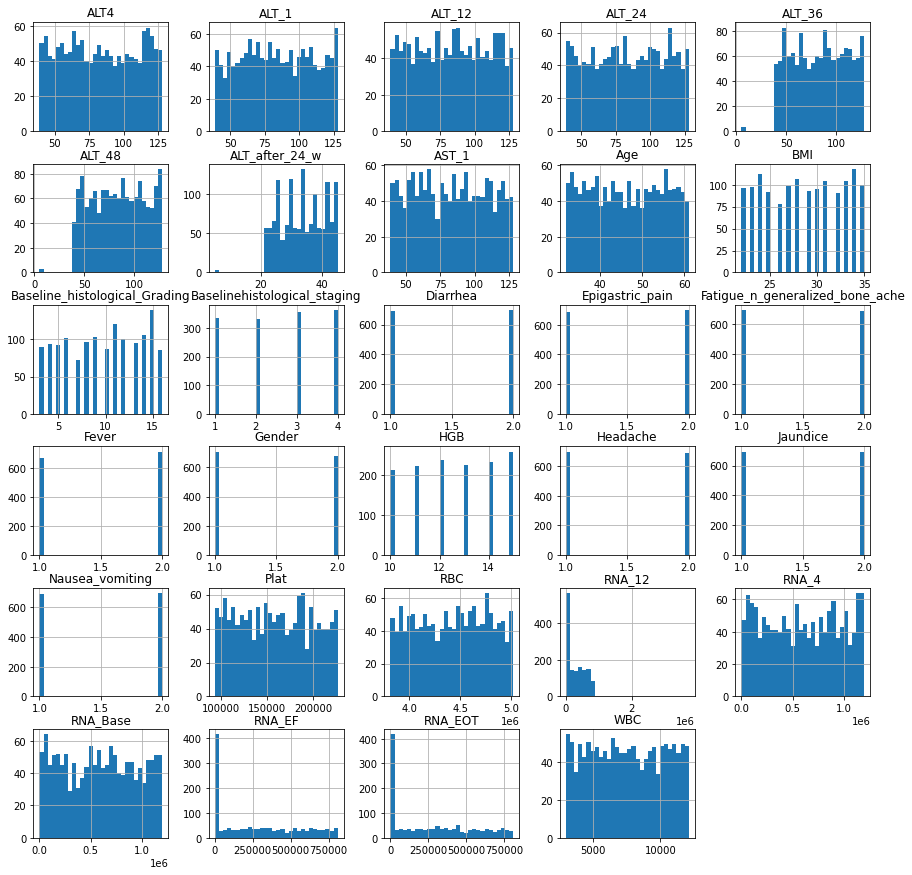

In [81]:
data.hist(bins=30,figsize=(15,15))

#### Normalizing the data

In [69]:
data = data.drop(columns=['Baselinehistological_staging'])

In [70]:
normalized_data = preprocessing.normalize(data)
x = pd.DataFrame(normalized_data,
                 columns=list(data))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EDA60F358>,
      dtype=object)

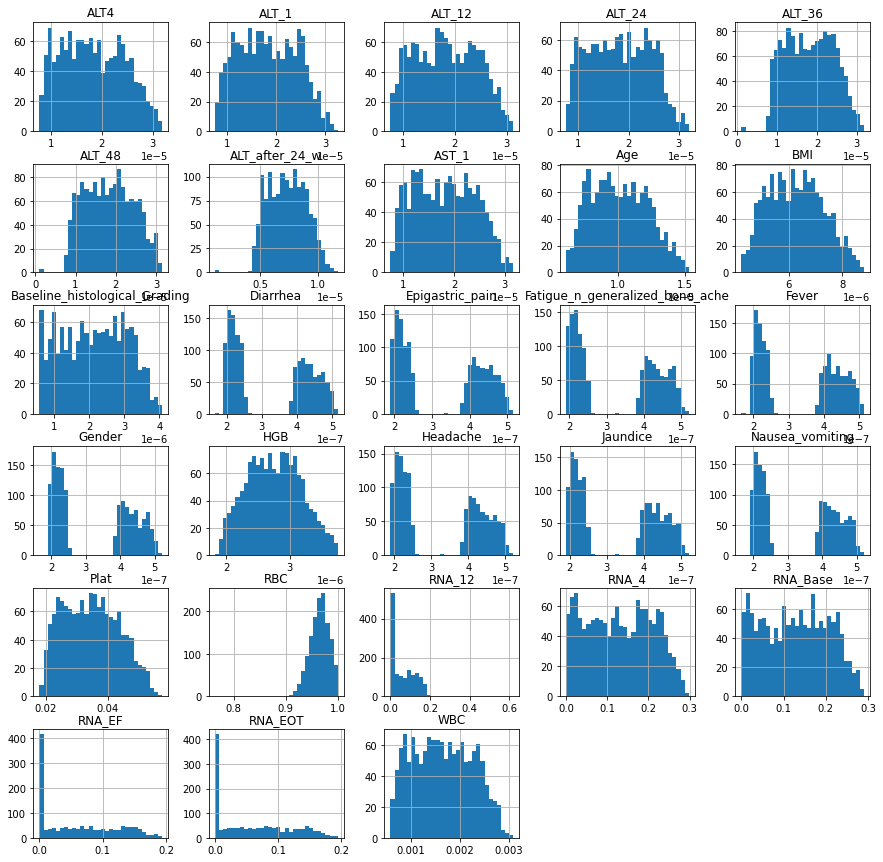

In [71]:
x.hist(bins=30,figsize=(15,15))

In [74]:
x.to_csv('new_data.csv')

#### Stand the data

In [72]:
#data = data.drop(columns=['Baselinehistological_staging'])
standardized_X = preprocessing.scale(x)
x = pd.DataFrame(standardized_X,
                 columns=list(data))

### We have of about 10 categorical features and we'll start by exploring them

##### We'll first change the numeric values with understanbale representation

In [8]:
data['Fever'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Nausea_vomiting'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Headache'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Fatigue_n_generalized_bone_ache'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Jaundice'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Diarrhea'].replace([1,2],["Didn't Occur",'Occured'],inplace=True)
data['Epigastric_pain'].replace([1,2],['Absent','Occured'],inplace=True)

data['Gender'].replace([1,2],["Male",'Female'],inplace=True)

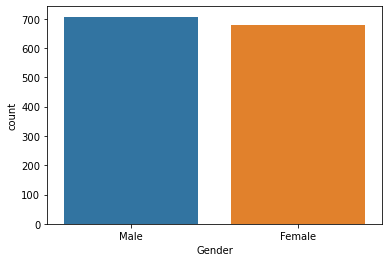

In [9]:
sns.countplot(data['Gender'])
plt.show()

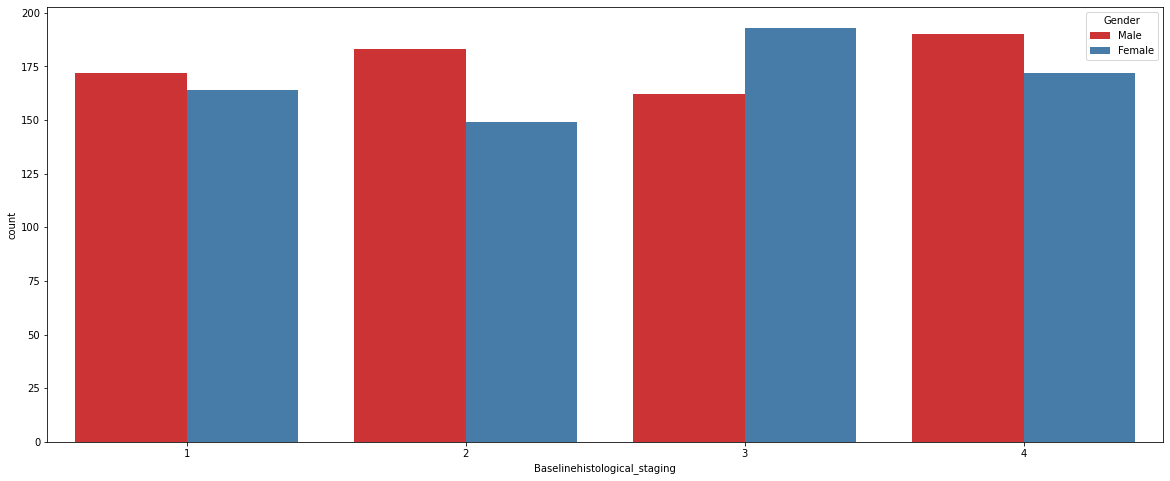

In [10]:
fig, axs = plt.subplots(figsize=(20,8))
sns.countplot(x=data['Baselinehistological_staging'],hue=data['Gender'],palette="Set1")

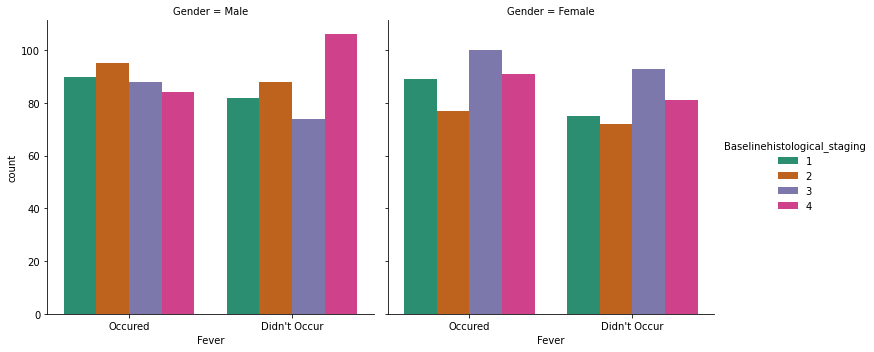

In [11]:
sns.catplot(x="Fever", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

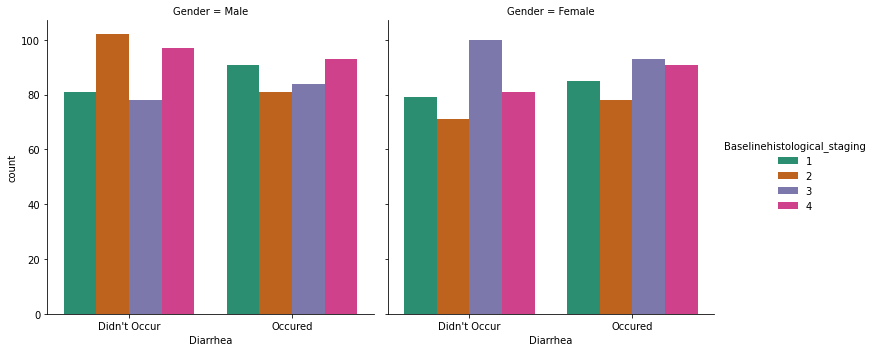

In [12]:
sns.catplot(x="Diarrhea", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

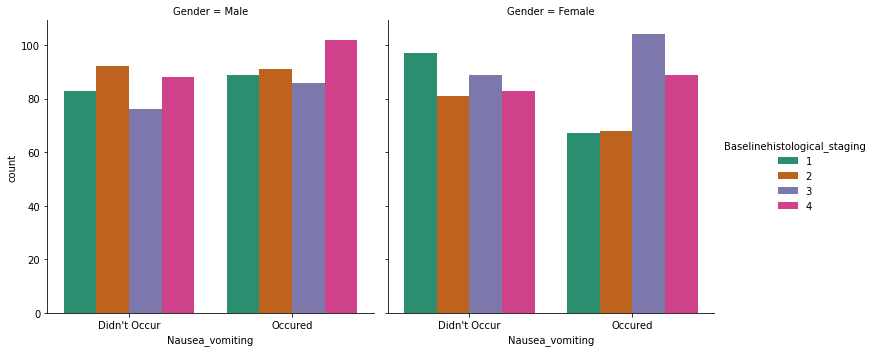

In [13]:
sns.catplot(x="Nausea_vomiting", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

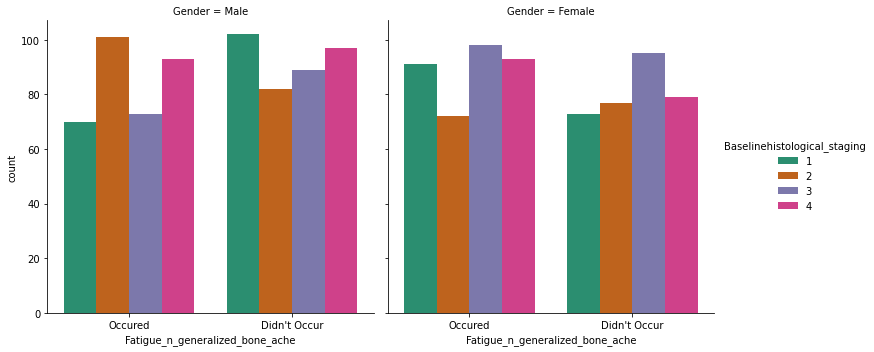

In [14]:
sns.catplot(x="Fatigue_n_generalized_bone_ache", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

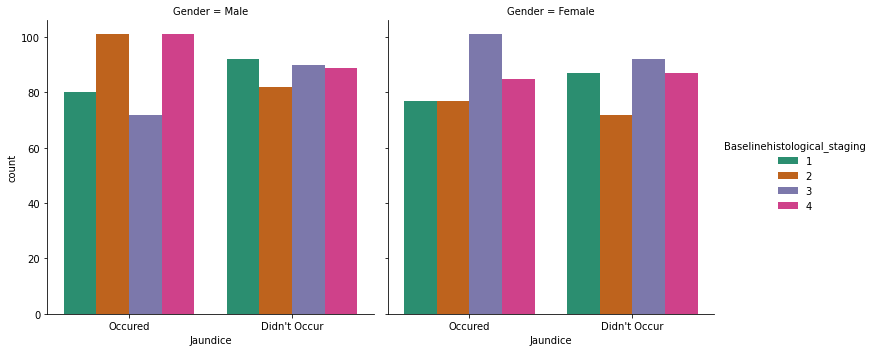

In [15]:
sns.catplot(x="Jaundice", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

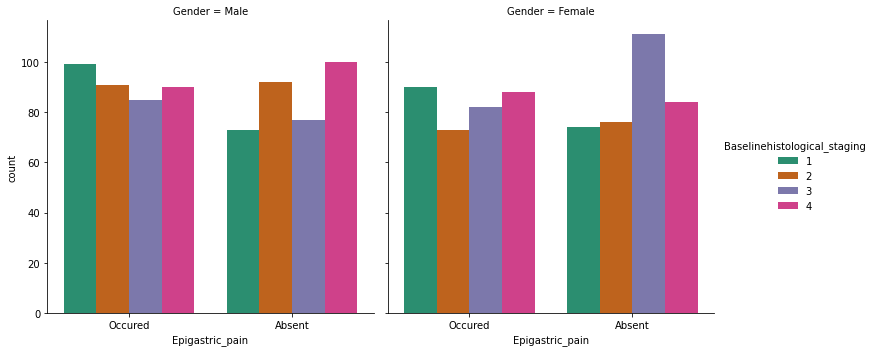

In [16]:
sns.catplot(x="Epigastric_pain", hue="Baselinehistological_staging", col="Gender",
                data=data, kind="count" ,palette='Dark2')

##### We look over the other features

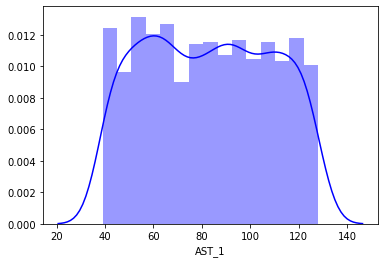

In [17]:
sns.distplot(data.AST_1,bins=15,color="blue")

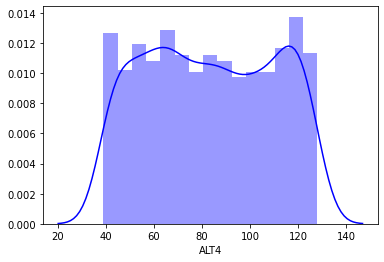

In [18]:
sns.distplot(data.ALT4,bins=15,color="blue")

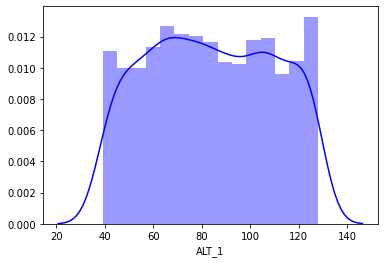

In [19]:
sns.distplot(data.ALT_1,bins=15,color="blue")

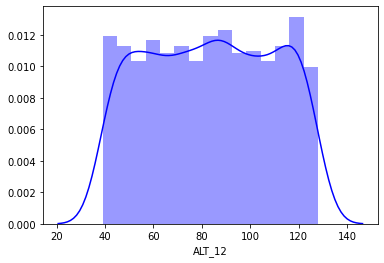

In [20]:
sns.distplot(data.ALT_12,bins=15,color="blue")

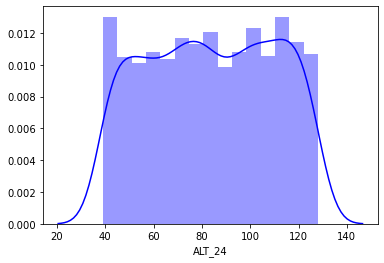

In [21]:
sns.distplot(data.ALT_24,bins=15,color="blue")

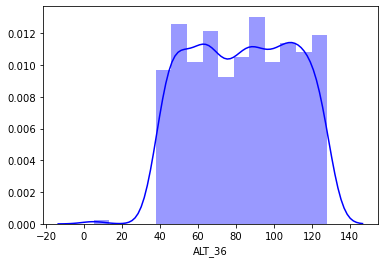

In [22]:
sns.distplot(data.ALT_36,bins=15,color="blue")

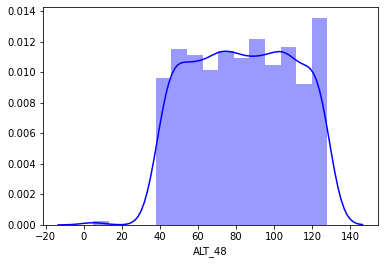

In [23]:
sns.distplot(data.ALT_48,bins=15,color="blue")

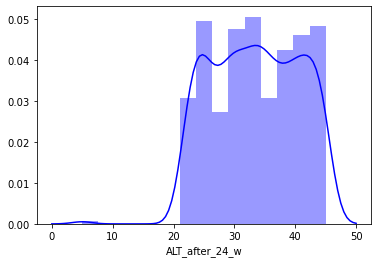

In [24]:
sns.distplot(data.ALT_after_24_w,bins=15,color="blue")

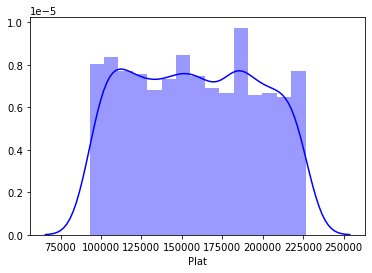

In [25]:
sns.distplot(data.Plat,bins=15,color="blue")

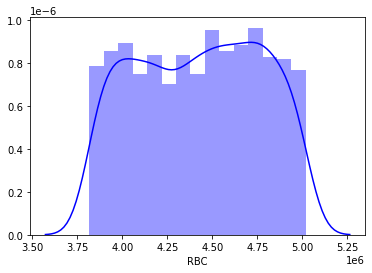

In [26]:
sns.distplot(data.RBC,bins=15,color="blue")

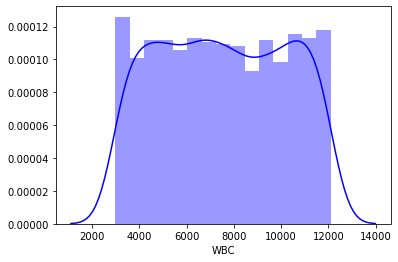

In [27]:
sns.distplot(data.WBC,bins=15,color="blue")

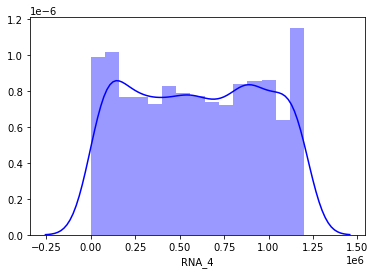

In [28]:
sns.distplot(data.RNA_4,bins=15,color="blue")

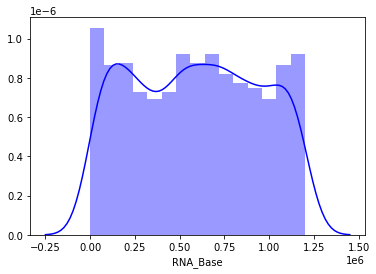

In [29]:
sns.distplot(data.RNA_Base,bins=15,color="blue")

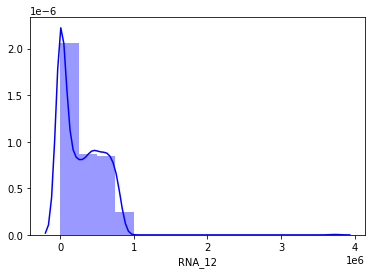

In [30]:
sns.distplot(data.RNA_12,bins=15,color="blue")

C:\Users\10\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


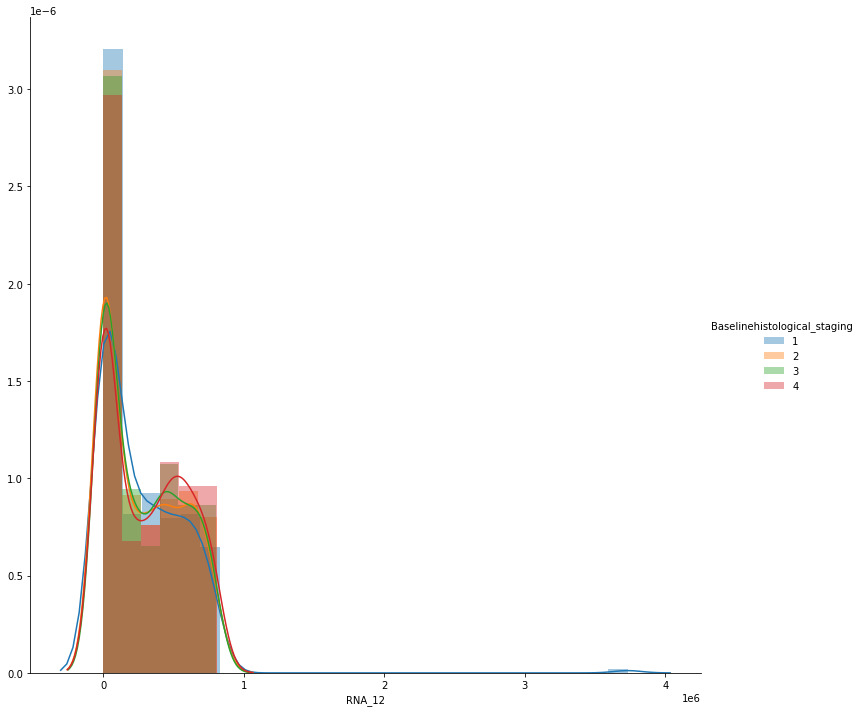

In [31]:
sns.FacetGrid(data,hue='Baselinehistological_staging',size=10).map(sns.distplot,'RNA_12').add_legend()

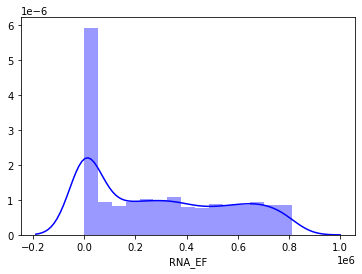

In [32]:
sns.distplot(data.RNA_EF,bins=15,color="blue")

C:\Users\10\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


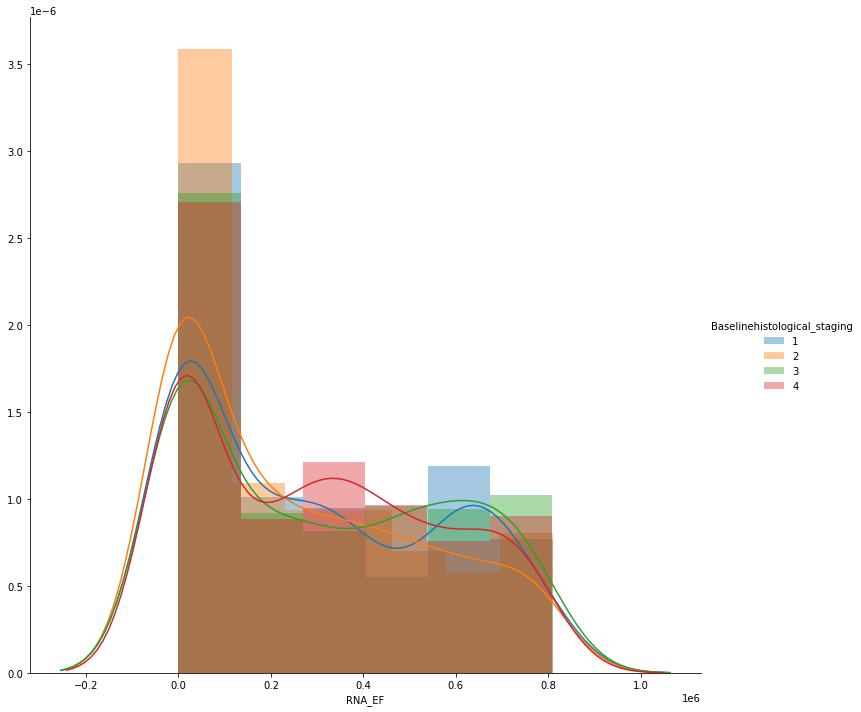

In [33]:
sns.FacetGrid(data,hue='Baselinehistological_staging',size=10).map(sns.distplot,'RNA_EF').add_legend()

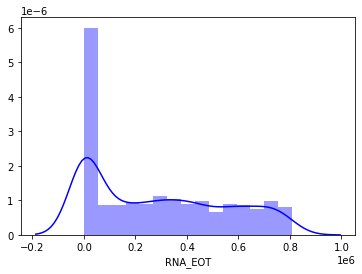

In [34]:
sns.distplot(data.RNA_EOT,bins=15,color="blue")

C:\Users\10\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


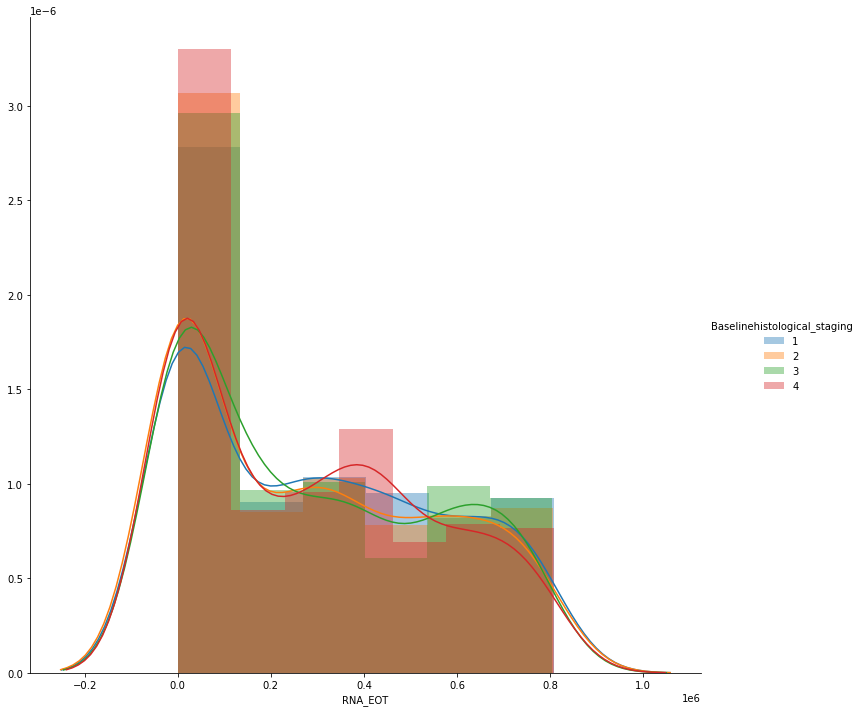

In [35]:
sns.FacetGrid(data,hue='Baselinehistological_staging',size=10).map(sns.distplot,'RNA_EOT').add_legend()

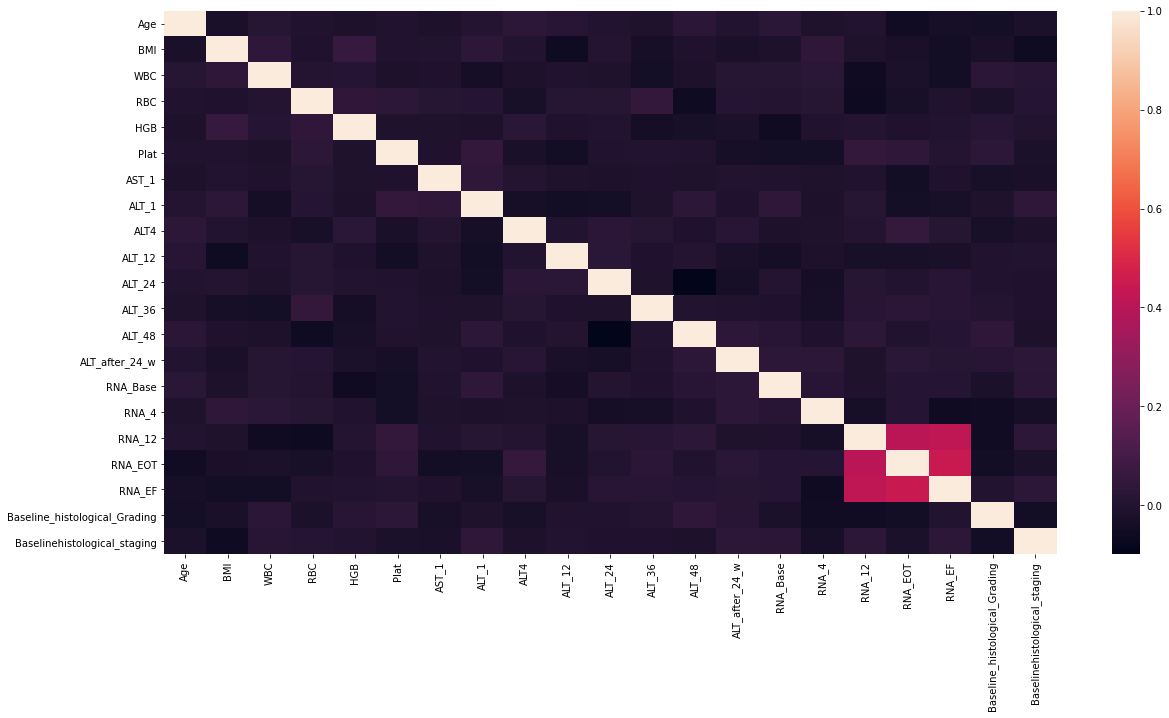

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), ax= ax)